In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
import datetime
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['animation.embed_limit'] = 2**128
mpl.rc('font', size=16) 

In [3]:
fn="data_eu_last_month.nc"
ds = nc.Dataset(fn)
lon=ds['longitude'][:]
lat=ds['latitude'][:]

time=[datetime.datetime(2020,10,21)+datetime.timedelta(hours = i) for i in range(ds['time'].shape[0])]
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (700,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (420,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    long_name: level
    units: m
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: ANALYSIS time from 20201021
    units: hours
unlimited dimensions: time
current shape = (768,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 ecff_conc(time, level, latitude, longitude)
    _FillValue: -999.0
    species: PM2.5 Elementa

<ipython-input-3-1197318b92da>:8: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(var)


In [4]:
print(f"latitude: Beginnt:{lat[0]}; Endet:{lat[-1]}")
print(f"longitude: Beginnt:{lon[0]}; Endet:{lon[-1]}")

latitude: Beginnt:71.94999694824219; Endet:30.049999237060547
longitude: Beginnt:335.04998779296875; Endet:44.95000076293945


In [5]:
alldata=[]
for t in range(ds['time'].shape[0]):
    alldata.append(ds['ecff_conc'][t,0,:,:])

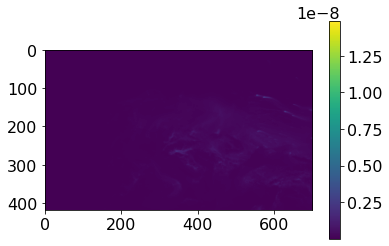

In [10]:
im=plt.imshow(alldata[100],interpolation='bilinear')
plt.colorbar()
im.set_array(alldata[0])

In [ ]:
fig, ax = plt.subplots(1,1,dpi=100) 
im=plt.imshow(alldata[0],vmin=vmin, vmax=vmax,interpolation='bilinear')
fig.set_size_inches(8,8)
plt.colorbar(im,fraction=0.046, pad=0.04)

def animate(i):
    data=alldata[i]#ds['co_conc'][i,0,:,:]
    print(i/length*100,end="\r")
    im.set_array(data)
    fig.suptitle(f"PM2.5 Elemental Carbon from Anthropogenic Fossil Fuels \n Cut at:{vmax}, elevation:0\n Zeit:{time[i]}")
    #plt.draw()
    
length=24
#ds['time'].shape[0]
anim = animation.FuncAnimation(fig, animate, frames=length, repeat = False)
#HTML(anim.to_jshtml())
#HTML(anim.to_html5_video())